In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
import sklearn as sk
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### 1. *k*-means on a Randomly Generated Dataset
30 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [2]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [5]:
centers = [[-2, 2], [2, -2]]
colors_map = np.array(['b', 'r'])
#blue for cluster 1
#red for cluster 2



['b' 'r']
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-2,-2],[-2,-2]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [12]:
#blue for cluster 1
#red for cluster 2
def calculate_distance(x,y, center):
    return np.sqrt((center[0]-x)**2 + (center[1]-y)**2)
def assign_members(x1, x2, centers):
    #Euclidean distance measure
    len_points=len(x1)
    class_of_points=[]
    colors=[]
    for i in range(len_points):
        min_dist= float('inf')
#         index=None
        distances=[calculate_distance(x1[i], x2[i], center) for center in centers]
        index=distances.index(min(distances))
#         for ind,center in enumerate(centers):
#             dist=np.sqrt((center[0]-x1[i])**2 + (center[1]-x2[i])**2)
#             if dist<min_dist:
#                 index=ind
#                 min_dist=dist
        
        
        #Got the cluster for this point.
        #index= 0 -> cluster 1
        #index=1 -> cluster 2
        class_of_points.append(index+1)
        colors.append(colors_map[index])
    return colors, class_of_points
        
    

#### Define a function that updates the centroid of each cluster

In the `update_centers` function you will take along with both features the class of points as parameter and returns the updated centers

In [16]:
def update_centers(x1, x2, class_of_points):
    #class of points= each index contains the cluster assigned to the corresponding point.
    cluster1_X=[x1[i] for i in range(len(class_of_points)) if class_of_points[i]==1]
    cluster1_Y=[x2[i] for i in range(len(class_of_points)) if class_of_points[i]==1]
    cluster2_X=[x1[i] for i in range(len(class_of_points)) if class_of_points[i]==2]
    cluster2_Y=[x2[i] for i in range(len(class_of_points)) if class_of_points[i]==2]
    updated_centers=[]
    updated_centers.append([np.mean(cluster1_X), np.mean(cluster1_Y)])
    updated_centers.append([np.mean(cluster2_X), np.mean(cluster2_Y)])
    return updated_centers

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [7]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

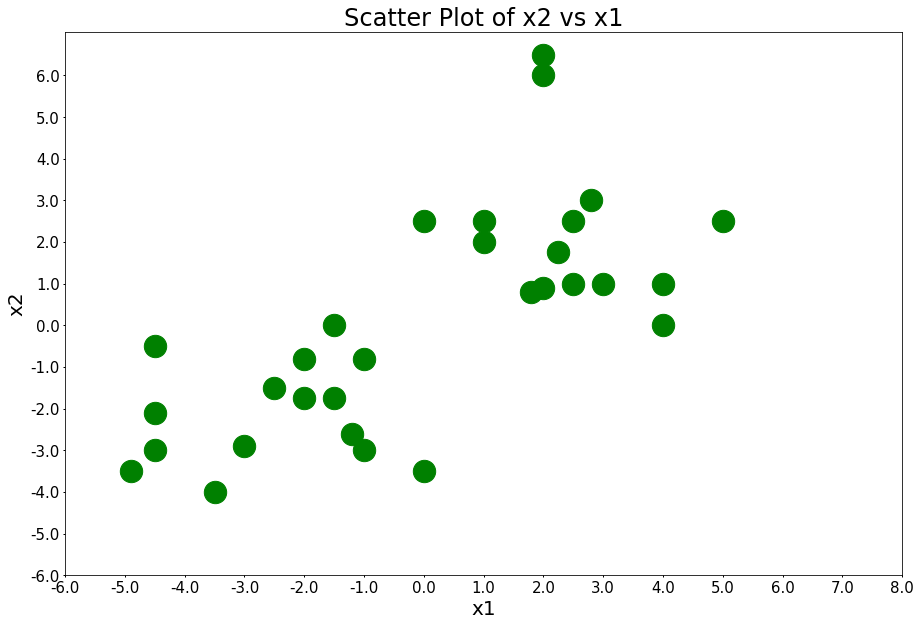

In [15]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

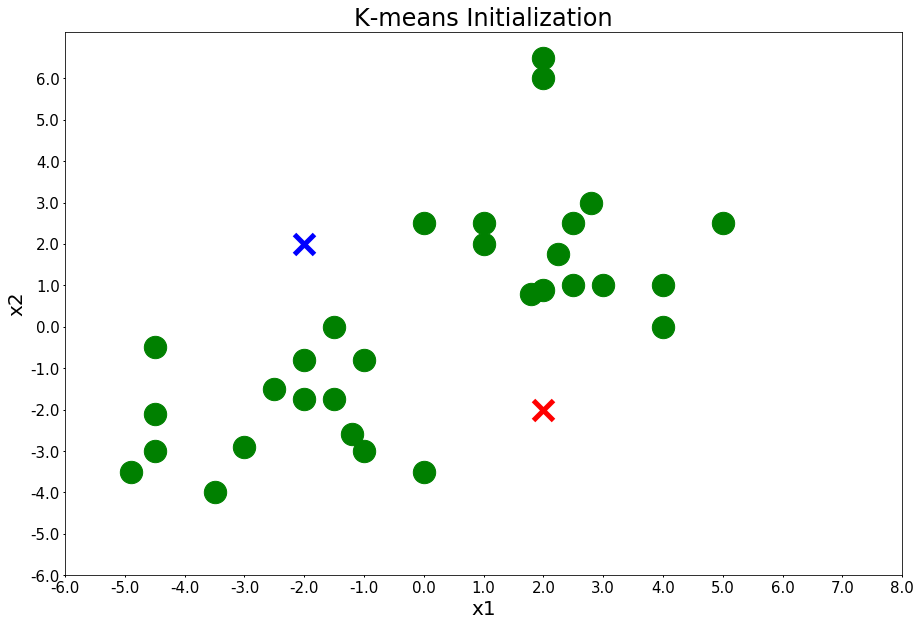

In [9]:
plot_points(centers, figure_title='K-means Initialization')


#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   
The last two plots should look like this after running it for 4 iterations after which it converges 

![Cluster Assignment](ClusterAssignment.PNG)
![Centroid Update](CenterUpdate.PNG)


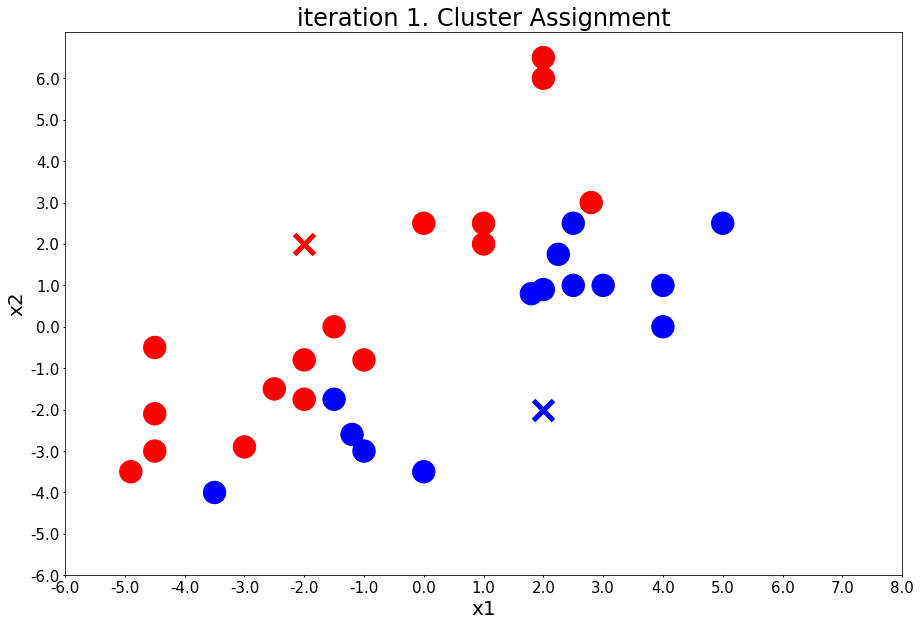

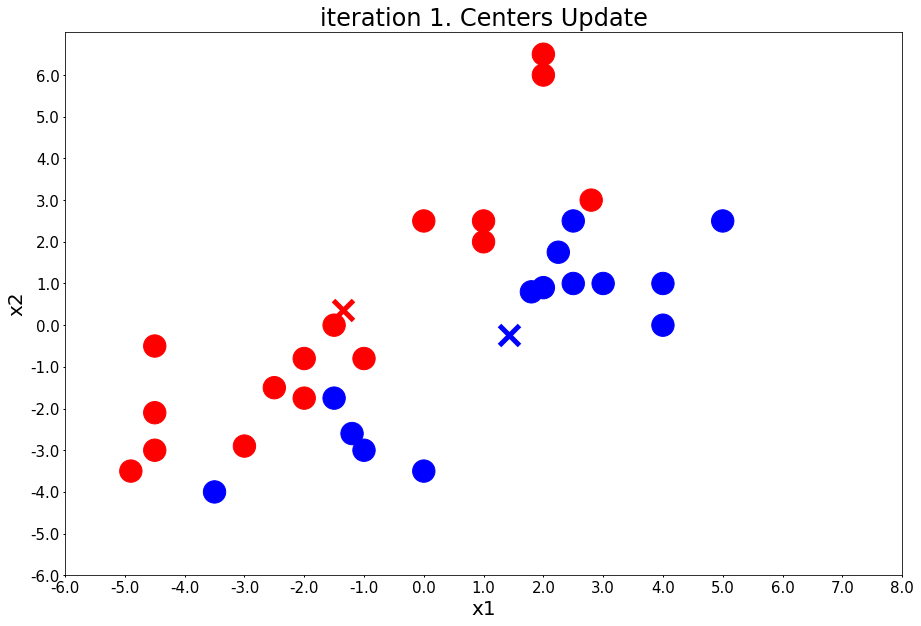

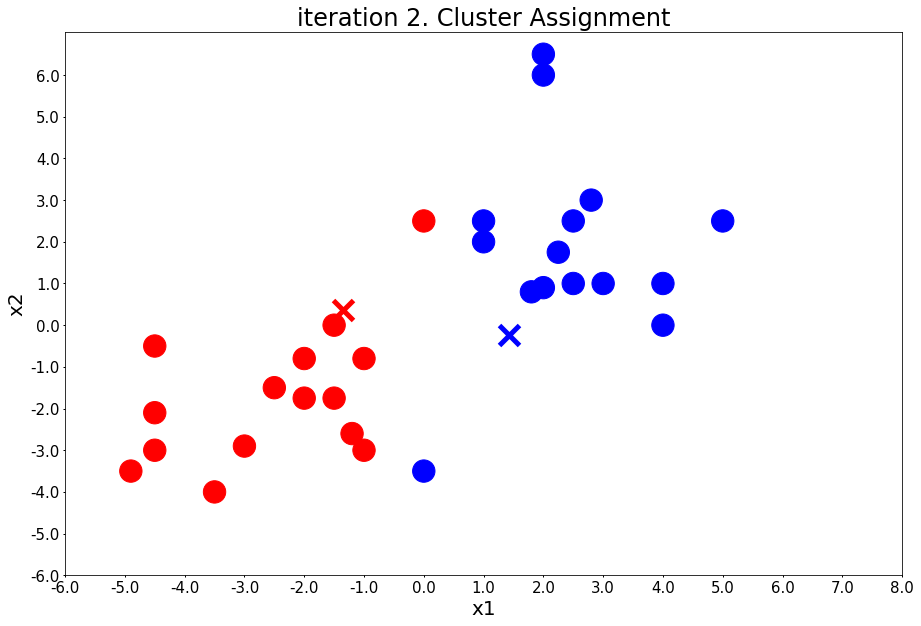

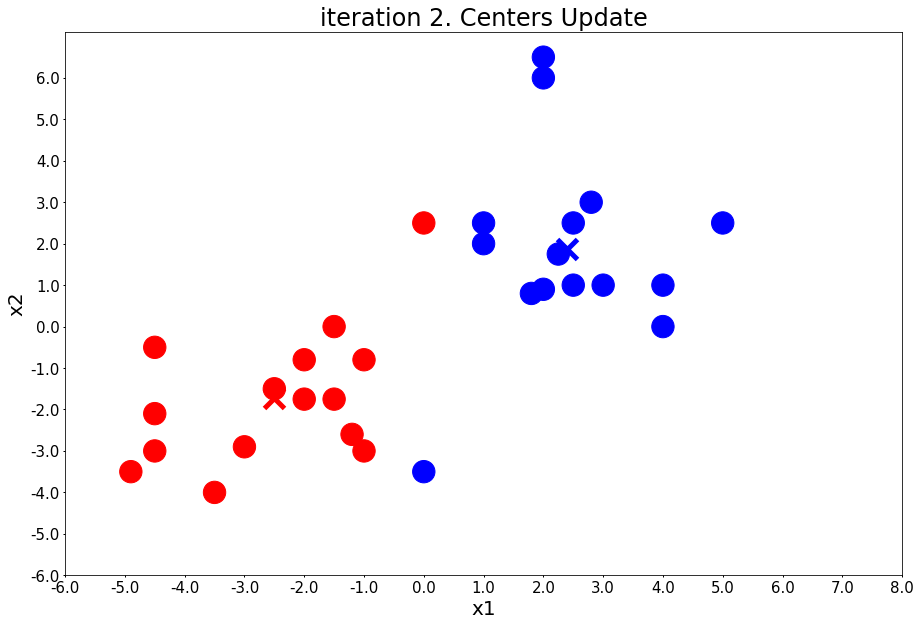

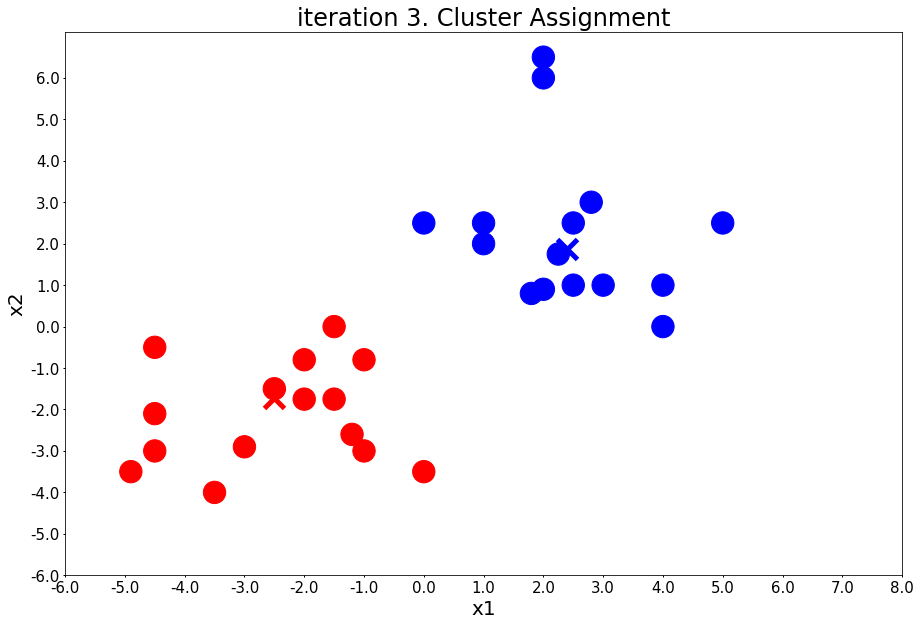

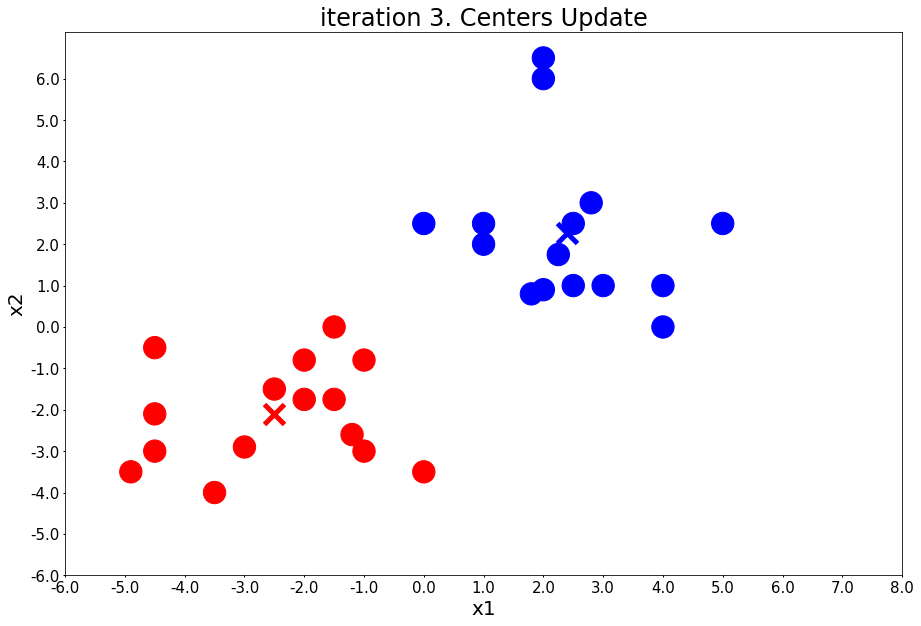

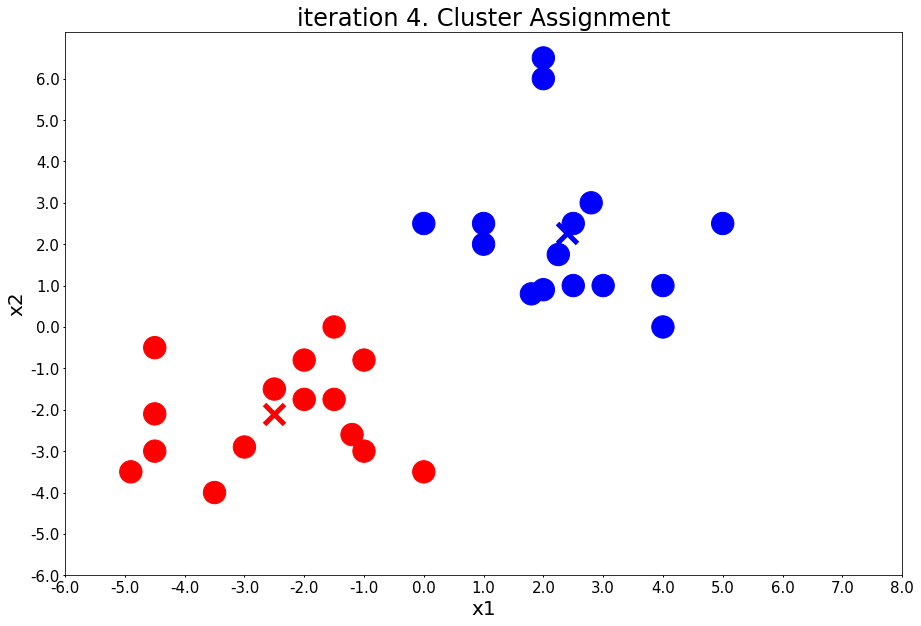

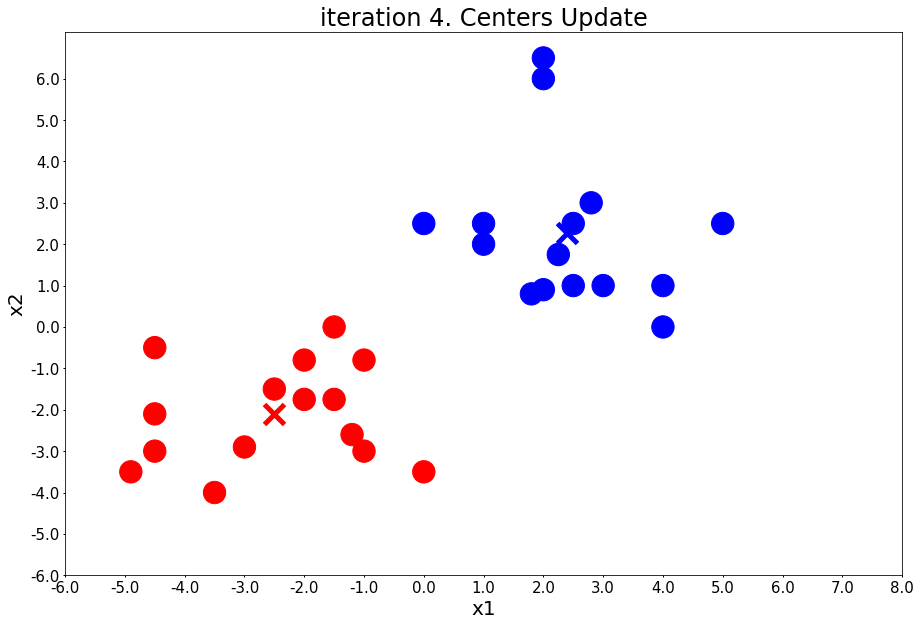

In [17]:
centers = [[2, -2], [-2, 2]]
number_of_iterations = 4

for i in range(0,number_of_iterations):
    # Your code goes here
    colors, class_of_points= assign_members(x1,x2,centers)
    plot_points(centers, colors, figure_title=f"iteration {i+1}. Cluster Assignment")
    centers=update_centers(x1,x2,class_of_points)
    plot_points(centers, colors, figure_title=f"iteration {i+1}. Centers Update")
    

### 2. *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [150]:
# Your code goes here
customer_data= pd.read_csv('customer_segmentation.csv', sep=",")
customer_data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [151]:
# Your code goes here
customer_data=customer_data.drop(['Customer Id','Defaulted', 'Address'],1)
# customer_data=customer_data.drop(['Customer Id', 'Address'],1)

customer_data.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** Customer Id was just increasing with every new row and is not useful for clustering. Similarly, the "Defaulted" attribute was a binary attribute with values of 0s and 1s, and it also had missing values. Binary Attributes tend to skew results of K-means and it's generally not recommended to include them for K-means cluster analysis as K-means uses Euclidean Distance for clustering (it'd be 0 or 1 always in the case of binary attributes). 

Lastly, since K-means uses Euclidean Distance metric, categorical variables would not be of much use to us so the "Address" Column was also dropped.

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [118]:
# Your code goes here
# customer_data.describe()
# customer_data=customer_data.bfill()
# customer_data=customer_data.ffill()
# customer_data['Defaulted']=customer_data['Defaulted'].fillna(value=customer_data['Defaulted'].mode()[0])
# customer_data.describe()

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** There are no Nan entries in my dataframe anymore as I already took care of them in the code above. There were Nan entries in the "Defaulted" attribute but as explained above, it's not good to add binary attributes for K-means clustering. So I dropped them.

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [153]:
# Your code goes here
X = None # Normalized numpy array, used later in the visualization step
# np_data= np.array(customer_data)
np_data=customer_data.to_numpy()
X=np_data
W=sk.preprocessing.normalize(np_data)

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 3 clusters here.
Initailize the `n_init` parameter to equal 12

In [164]:
# Your code goes here

# Initialize
k_means= KMeans(n_clusters=3, n_init=12)
# Fit
# k_means=k_means.fit(X)
# k_means.fit(X)
# labels=k_means.labels_
# Print labels
labels2=k_means.fit(W).labels_
print(labels2)
# print(labels2)

[1 0 0 1 0 0 0 0 2 0 0 1 1 2 2 2 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 2 1 0 2 0 2 0 2 0 2 1 1 0 0 2 2 1 0 2 1 1 0 1 0 1 0 0 1 0 0 1 2 2 0 0 0 0
 1 2 1 1 0 1 0 0 0 1 1 1 2 2 1 2 0 1 1 2 1 1 1 1 2 1 2 0 0 1 2 2 1 2 0 0 0
 2 0 2 1 1 2 0 0 1 2 0 1 0 0 0 0 1 2 1 1 0 1 1 2 1 0 2 1 2 1 2 0 2 0 2 0 1
 0 1 1 2 1 2 0 1 0 0 2 0 1 2 0 0 2 1 0 1 1 1 0 2 1 0 1 2 0 1 1 0 1 1 1 0 2
 0 1 1 1 0 2 2 0 1 0 1 2 0 0 1 0 1 2 1 1 1 1 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0
 1 1 1 1 0 1 2 1 1 2 0 2 0 1 1 2 0 0 1 1 1 1 1 0 0 0 0 2 1 0 1 2 0 2 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 2 1 1 1 1 1 2 0 1 1 1 0 0 2 0 1 0 0 0 0 1 1 1 2 0 2
 2 1 0 0 0 0 1 1 2 0 1 2 2 1 0 2 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 1 0 1 0 0 2
 1 1 2 1 0 2 1 1 0 1 2 0 1 2 0 1 1 0 1 1 1 1 1 0 1 1 2 0 2 1 1 0 2 0 0 0 0
 1 1 0 1 2 2 2 1 1 2 1 1 1 2 0 1 0 2 1 1 2 0 1 2 2 0 1 0 1 1 2 1 2 2 2 1 1
 1 0 1 0 0 0 2 0 1 0 2 1 1 0 0 2 1 0 1 1 2 1 1 0 2 2 2 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 0 1 2 1 1 0 1 0 2 2 0 2 0 1 0 1 0 1 1 0 1 1 0 1 1 2 0
 2 0 2 1 1 1 0 2 1 2 0 1 

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  
1. Elbow Method: For different values of "k", the sum of squared distances within each cluster (distance b/w every point in a cluster and its centroid) is calculated. This sum decreases with increasing k, so an elbow curve is plotted. The number of clusters where the curve starts to flatten is considered the optimal number of clusters. 

2. Average Silouhette Method: The silouhette score is also calculated for every value of "k". This score is calculated per point. for one point in cluster C, the average distance is calculated between this point and all the other points in the same cluster, call this A. Then the average distance is calculated between all other points in the nearest neighboring cluster to this point, call this B.
The formula is: B-A/max(A,B) This coefficient is calculated per point and the sum is taken. A curve is plotted for the silouhette score for each value of k and the optimal number of clusters is where the graph peaks (max silouhette score). The silouhette coefficient has values from -1 to 1, a value of 1 indicating that the data point is far away from the nearest cluster meaning it's in the correct cluster and vice versa for -1

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [165]:
# Your code goes here
customer_data['Labels']=labels2


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

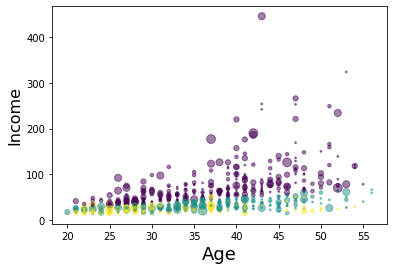

In [166]:
area = np.pi * ( X[:, 1])**2  
area2= np.pi * (np_data[:,1])**2
# print(customer_data.dtypes)
# sns.scatterplot('Age', 'Income', hue='Labels', s=area2, alpha=0.5, data=customer_data, palette='coolwarm')
# plt.scatter(X[:, 0], X[:, 3],s=area, c=labels.astype(np.float), alpha=0.5)
# plt.scatter(np_data[:, 0], np_data[:, 3], s=area2, c=labels.astype(np.float), alpha=0.5)
plt.scatter(np_data[:, 0], np_data[:, 3], s=area, c=labels2.astype(np.float), alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 3 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [179]:
# Your code goes here
# cluster1=customer_data[customer_data.Labels==0]
# cluster2=customer_data[customer_data.Labels==1]
# cluster3=customer_data[customer_data.Labels==2]
# cluster1.describe()
customer_data.groupby("Labels").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Labels,,,,,,,
0,37.615635,1.938111,13.087948,79.000000,2.653593,5.069104,10.002932
1,34.599455,1.580381,7.032698,30.577657,0.752891,1.500700,6.973025
2,31.414773,1.585227,3.875000,23.857955,1.416665,2.897642,17.135795


Characteristics for each cluster  
1. Higher age, much higher income, are generally employed for longer and have higher education level. They have the most debt (card and other). 
2. Moderate age, much lower income than those with higher age but have the least debt.
3. Lowest Age, lowest income, with moderate debt but highest DebtIncomeRatio.

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. Hierarchal clustering is not good for large datasets but K-means is scalable, it can work with large datasets.
2. K-means is much faster than DB-Scan.

**Disadvantages**
1. K-means only works on numeric attributes whereas Hierarchal clustering is more flexible, you can use any measure. 
2. We need to specify k for KMeans but algorithms such as DB-Scan don't need it. DB-Scan finds the number of clusters according to the input data.

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [187]:
### Code here
customer_shopping= pd.read_csv('customers_shopping.csv', sep=",")
customer_shopping.head(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [241]:
customer_shopping.describe() #no missing values


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [195]:
data_to_use=customer_shopping.drop(['CustomerID', 'Age', 'Genre'],1)

X=np.array(data_to_use)


**Dendrogram** is used to visualize the history of groupings and figure out the optimal number of clusters.

**Question:** Draw **two dendograms using two different linkage methods**. *Comment on the cause of differences between the two*.

Pick **one** of the above which you find to be the best. Mention the **number of clusters** and justify your answer.

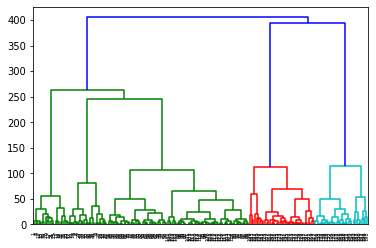

In [196]:
#### Draw dendrogram here
dendrogram_1=sch.dendrogram(sch.linkage(X, method="ward"))
plt.show()

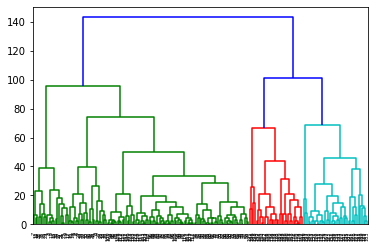

In [197]:
dendrogram_2=sch.dendrogram(sch.linkage(X, method="complete"))
plt.show()

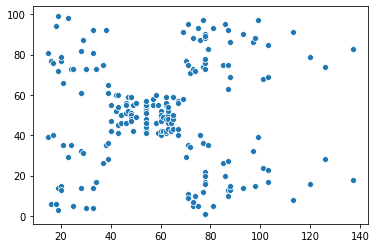

In [198]:
#### Draw dendrogram here
sns.scatterplot(X[:,0], X[:,1])
plt.show()

### Cause of Differences: Both methods use different metrics for finding out "nearby" clusters. Complete linkage defines distance between clusters as the max distance between two points in the two clusters. 

### Ward uses sum of squares and minimizes within-cluster variance. It merges those clusters whose total within cluster variance distances between each of the points in the two clusters and takes the average. So, due to both using different metrics they find clusters differently which yields a different number of clusters as seen from the dendrograms.

### Optimal Number of Clusters: 5 clusters using Ward

### Justification: It depends on our dataset which linkage is better and ward usually returns a higher number of clusters. In a dataset such as the customer dataset we would like to divide our customers into more segments, 5 would be better as compared to just 2 (we get two clusters with complete linkage). Moreover, the scatterplot above also clearly shows that the customers are divided into 5 clusters. 

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

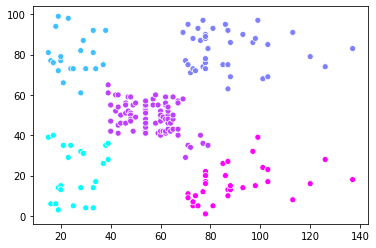

In [242]:
### write your code here
agg=AgglomerativeClustering(n_clusters=5).fit(X)
labels=agg.labels_
data_to_use['label']=labels
# print(labels)
sns.scatterplot(X[:,0], X[:,1], hue=labels, palette='cool_r', legend=False)

**Question:** What do each of the clusters represent?

**Answer:** 
<ol>
    <li> Cluster 1: High Income, low spending. Careful spender/Miser
    <li> Cluster 2: Moderate Income, Moderate spending. Comes in the middle, can be classified as the average consumer.
    <li> Cluster 3: Low Income, Low spending- Expected.
    <li> Cluster 4: Low Income, High spending- Interesting. Careless? Non-Saving.
    <li> Cluster 5: High Income High spending- Extravagant, can be targeted in marketing campaigns. 
</ol>